In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

import h5py
import pandas as pd
import Name_resolver as nr




file_location = '/data/CoCoCoNet/networks/fruitfly_prioAggNet.hdf5'

net = h5py.File(file_location,'r')
agg_dataset = net['agg'] 
row_dataset = net['row']
col_dataset = net['col']
row_gene_list = []
for gene in row_dataset:
    row_gene_list.append(gene.decode('UTF-8'))
col_gene_list = []
for gene in col_dataset: 
    col_gene_list.append(gene.decode('UTF-8'))
net_df = pd.DataFrame(data = agg_dataset[:,:], index = row_gene_list, columns = col_gene_list)
net.close()


In [3]:
net_df

,FBgn0267798,FBgn0267430,FBgn0086917,FBgn0010247,FBgn0086378,FBgn0263977,FBgn0069923,FBgn0039955,FBgn0259821,FBgn0027341,...,FBgn0013685,FBgn0013678,FBgn0013679,FBgn0013686,FBgn0013688,FBgn0261386,FBgn0267508,FBgn0085753,FBgn0267511,FBgn0267505
FBgn0267798,1.000000,0.178544,0.062701,0.067010,0.013186,0.052590,0.014360,0.066774,0.389033,0.054301,...,0.078219,0.053301,0.107611,0.053658,0.021055,0.230816,0.003732,0.000530,0.009230,0.006948
FBgn0267430,0.178544,1.000000,0.265706,0.428158,0.122142,0.221337,0.226214,0.331032,0.589073,0.207456,...,0.178424,0.317433,0.286925,0.142876,0.303175,0.462476,0.109707,0.029295,0.110942,0.242553
FBgn0086917,0.062701,0.265706,1.000000,0.277342,0.278439,0.306008,0.230486,0.346308,0.478592,0.497237,...,0.070937,0.243864,0.241326,0.124637,0.111875,0.288228,0.016539,0.069409,0.024407,0.020866
FBgn0010247,0.067010,0.428158,0.277342,1.000000,0.954183,0.976127,0.809105,0.999038,0.553732,0.450368,...,0.402448,0.731777,0.647943,0.730103,0.451315,0.320095,0.154106,0.183496,0.123147,0.268025
FBgn0086378,0.013186,0.122142,0.278439,0.954183,1.000000,0.999612,0.990320,0.967802,0.288671,0.512374,...,0.613482,0.779674,0.756894,0.781016,0.478942,0.226979,0.189469,0.231991,0.251125,0.180656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0261386,0.230816,0.462476,0.288228,0.320095,0.226979,0.373998,0.397313,0.346436,0.645828,0.417762,...,0.098625,0.358170,0.321998,0.241616,0.325031,1.000000,0.043654,0.032026,0.035254,0.064805
FBgn0267508,0.003732,0.109707,0.016539,0.154106,0.189469,0.207049,0.229534,0.117511,0.111926,0.037065,...,0.078527,0.176327,0.221194,0.452202,0.509441,0.043654,1.000000,0.755369,0.692551,0.259673
FBgn0085753,0.000530,0.029295,0.069409,0.183496,0.231991,0.220592,0.170626,0.174975,0.044014,0.102820,...,0.133898,0.198414,0.264993,0.269908,0.469089,0.032026,0.755369,1.000000,0.840269,0.341524
FBgn0267511,0.009230,0.110942,0.024407,0.123147,0.251125,0.281412,0.167175,0.266415,0.035394,0.100867,...,0.163041,0.188517,0.263813,0.251757,0.435990,0.035254,0.692551,0.840269,1.000000,0.343070


In [4]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck


def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype(float)
    np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)


def _runNV(go, nw, nFold=3, min_count=20, max_count=1000):

    #Make sure genes are same in go and nw
    genes_intersect = go.index.intersection(nw.index)

    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]

    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]

    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns)


def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()
        
    CVgo = np.concatenate(list(cvgo.values()), axis=1)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)

    predicts = sumin / degree[:, None]

    np.place(predicts, CVgo > 0, np.nan)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan

    filtering = np.tile(go, nFold)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)

    #Number of predictions
    #Number of 1's masked for each GO term for each CV
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *
                                                (n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn

    return roc, avg_degree, roc_null, P


In [5]:
brooke_genes = pd.read_csv('/data/passala/Generated_Tables/Temp_junk/brooke_genes.csv')
brooke_genes

,gene
0,FBgn0266696
1,FBgn0035357
2,FBgn0260442
3,FBgn0036451
4,FBgn0000565
...,...
61,FBgn0053199
62,FBgn0266486
63,FBgn0267002
64,FBgn0032208


In [6]:
brooke_gene_list = brooke_genes['gene'].to_list()

In [7]:
brooke_gene_list.remove('FBgn0266486')

In [8]:
net_df[brooke_gene_list]

,FBgn0266696,FBgn0035357,FBgn0260442,FBgn0036451,FBgn0000565,FBgn0010352,FBgn0036921,FBgn0028697,FBgn0266098,FBgn0266019,...,FBgn0027583,FBgn0028646,FBgn0051992,FBgn0264607,FBgn0058263,FBgn0000546,FBgn0053199,FBgn0267002,FBgn0032208,FBgn0043841
FBgn0267798,0.159031,0.134078,0.207542,0.196402,0.099128,0.233674,0.060925,0.085306,0.146662,0.121935,...,0.085308,0.091458,0.134263,0.081157,0.022537,0.100776,0.055792,0.147098,0.112248,0.061492
FBgn0267430,0.509770,0.227402,0.272487,0.240280,0.049656,0.363778,0.092240,0.054816,0.324755,0.300465,...,0.131310,0.046494,0.340069,0.430736,0.374000,0.253712,0.428060,0.309271,0.357273,0.311255
FBgn0086917,0.050350,0.218956,0.179783,0.129226,0.155550,0.139971,0.312792,0.241850,0.200509,0.170670,...,0.048266,0.056735,0.357208,0.540824,0.395465,0.364821,0.363935,0.249139,0.174552,0.366583
FBgn0010247,0.777669,0.835718,0.774306,0.844735,0.604860,0.677908,0.919653,0.887156,0.459270,0.822386,...,0.792853,0.695216,0.979130,0.955923,0.930090,0.849171,0.529887,0.743456,0.861945,0.452083
FBgn0086378,0.564315,0.699574,0.616994,0.669751,0.773325,0.626875,0.989524,0.992728,0.161181,0.681685,...,0.875274,0.800441,0.867616,0.878831,0.956624,0.729987,0.505840,0.580950,0.725857,0.675121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0261386,0.397810,0.093787,0.405045,0.259512,0.282912,0.574602,0.115887,0.306411,0.264099,0.198360,...,0.233286,0.222733,0.292693,0.521147,0.277626,0.098662,0.490914,0.456640,0.287969,0.477135
FBgn0267508,0.064681,0.089486,0.025212,0.020061,0.036125,0.010038,0.111104,0.180919,0.008712,0.026089,...,0.102444,0.004103,0.076600,0.138986,0.152325,0.143805,0.054795,0.041099,0.023477,0.025319
FBgn0085753,0.195446,0.088434,0.204475,0.107240,0.039640,0.010231,0.178155,0.193957,0.086785,0.232520,...,0.049849,0.032147,0.201119,0.221354,0.128785,0.265283,0.056180,0.093308,0.143727,0.063267
FBgn0267511,0.197959,0.075805,0.165040,0.100516,0.200206,0.085417,0.314380,0.280986,0.074686,0.152365,...,0.113203,0.071844,0.126479,0.172118,0.180105,0.188504,0.074392,0.128833,0.169241,0.133104


In [9]:
coconet_only_25 = net_df.loc[brooke_gene_list][net_df.columns[net_df.columns.isin(brooke_gene_list)]]

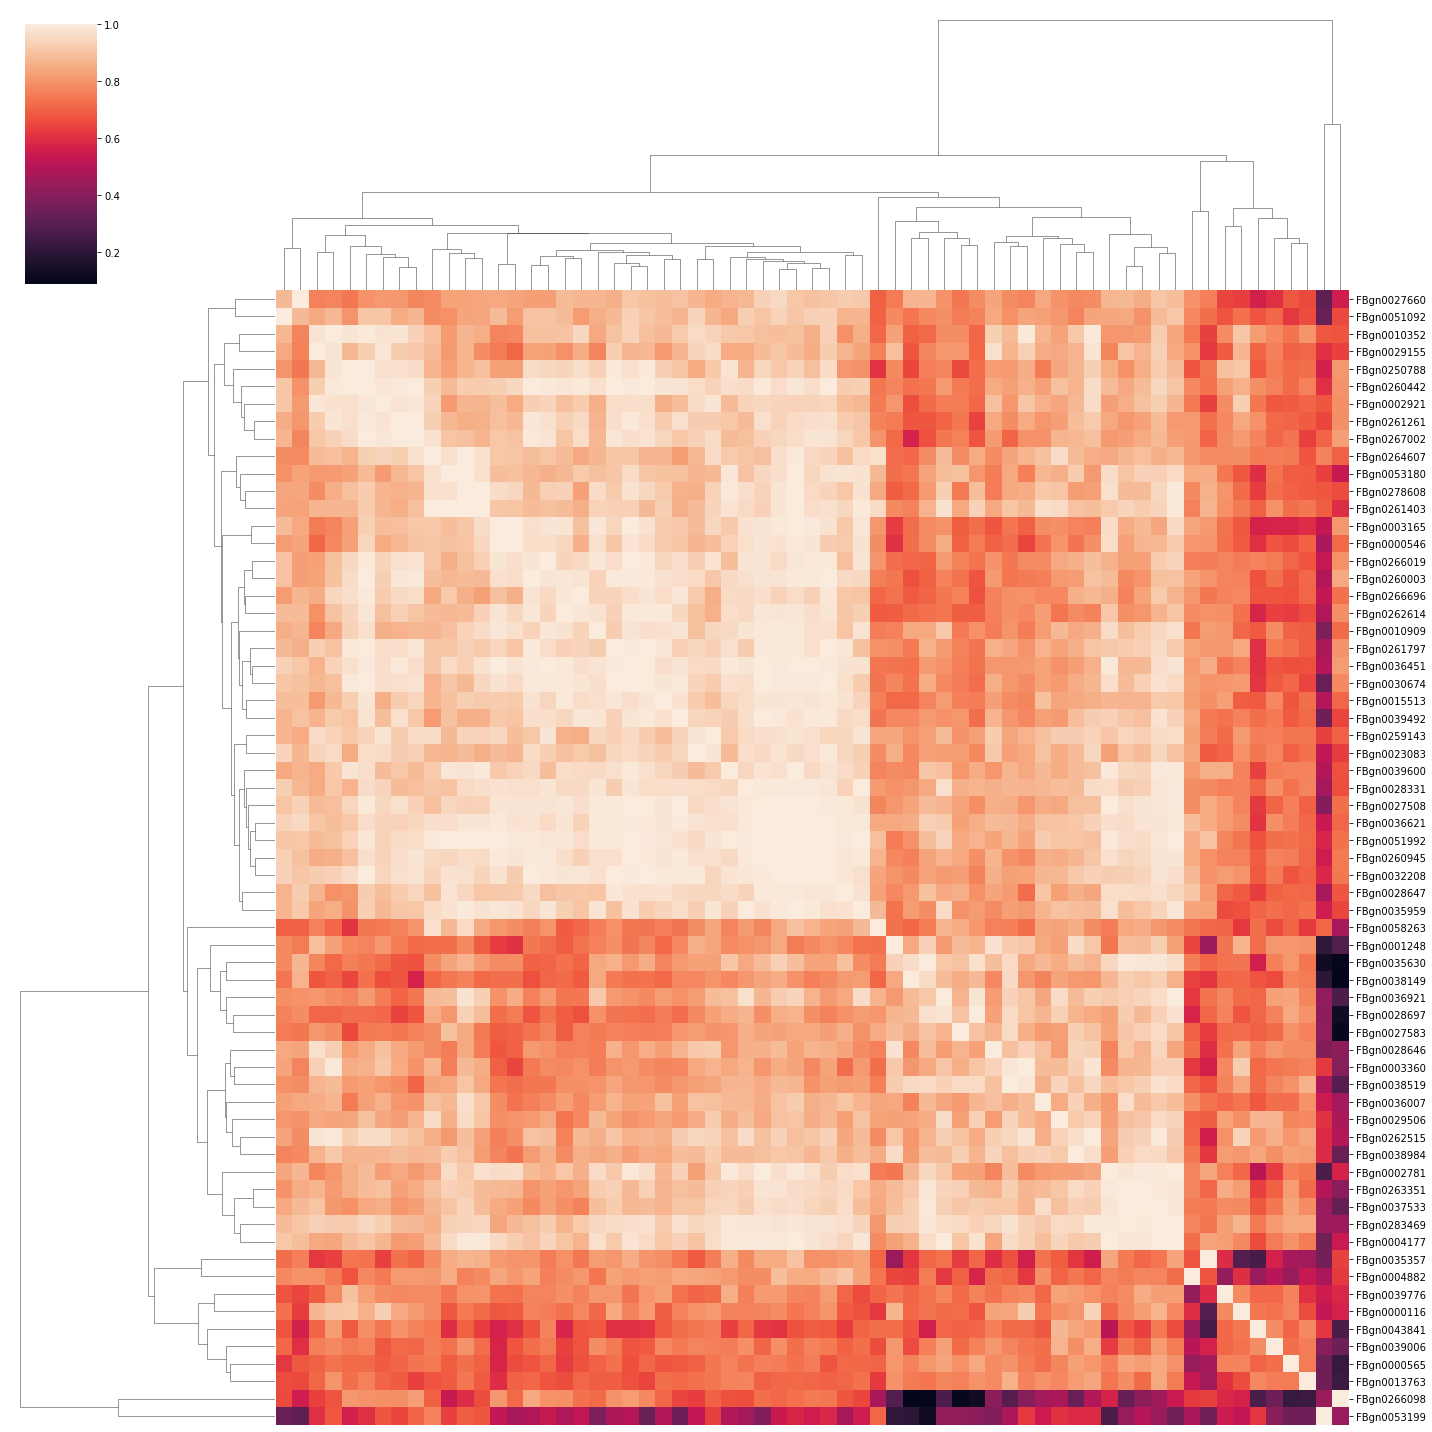

In [10]:
fig = sns.clustermap(coconet_only_25, metric = 'euclidean', figsize= (20,20),xticklabels = False)
fig.savefig('/data/passala/Collaborator_Data/Penelope_Dave_Collab/Figs/brooke_plot.png',facecolor = 'white')


In [11]:
#fig = sns.clustermap(net_df, metric = 'euclidean', figsize= (20,20),xticklabels = False)


In [12]:
panda_of_interest_go_style = pd.DataFrame(data = 0, columns = ['Top Genes of Interest'],index= net_df.index)
panda_of_interest_go_style

,Top Genes of Interest
FBgn0267798,0
FBgn0267430,0
FBgn0086917,0
FBgn0010247,0
FBgn0086378,0
...,...
FBgn0261386,0
FBgn0267508,0
FBgn0085753,0
FBgn0267511,0


In [13]:
panda_of_interest_go_style['Top Genes of Interest'].loc[panda_of_interest_go_style.index.isin(brooke_gene_list)] = 1 

In [14]:
panda_of_interest_go_style.sum()

Top Genes of Interest    65
dtype: int64

In [15]:
run_egad(nw = net_df, go = panda_of_interest_go_style, min_count = 5)

,AUC,AVG_NODE_DEGREE,DEGREE_NULL_AUC,P_Value
Top Genes of Interest,0.725321,7261.145456,0.771022,1.556806e-10
